<center><h1>MINERIA DE DATOS</h1>
<strong>Proyecto de Clasificación</strong><br />
PROFESORA ELIZABETH LEON GUZMAN <br />
<strong>María Camila Preciado Rojas</strong><br />
<strong>Juan Leonardo Padilla</strong><br /></center>

In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt


In [75]:

df = pd.read_csv('Ventas_cleaned.csv')

In [76]:
#Tipo de combustible es nullo quitarlo
#unificando los valores que son dinero.
df['F_ValorAPagar__GNV'] = df.TER_Venta_1_galon__c * df.Ter_CantidadTotal__c
df = df.loc[df['F_TipoCombustible__c'].notnull() ].copy()

df['F_ValorAPagar__c'] = df['F_ValorAPagar__c'].str.replace('$','')
df['F_ValorAPagar__c'] = df['F_ValorAPagar__c'].str.replace('.','')
df['F_ValorAPagar__c'] = df['F_ValorAPagar__c'].str.replace(',','.')
df['F_ValorAPagar__c'] = df.F_ValorAPagar__c.astype("float")

In [77]:

# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['Segmento_EDS__c'])
# Drop column B as it is now encoded
df = df.drop('Segmento_EDS__c',axis = 1)
# Join the encoded df
df = df.join(one_hot)


In [78]:
df4 = np.array(df)
df4

array([['a1J3f000001rl5sEAA', '00541000002HLzZAAW', 0, ..., 0, 0, 0],
       ['a1J3f000001sDdCEAU', '00541000002HLzZAAW', 0, ..., 0, 0, 1],
       ['a1J3f000001s8WGEAY', '00541000002HLzZAAW', 0, ..., 0, 0, 0],
       ...,
       ['a1J3f000001vHi1EAE', '00541000002HLzZAAW', 0, ..., 0, 0, 1],
       ['a1J3f000001vHLqEAM', '00541000002HLzZAAW', 0, ..., 0, 0, 0],
       ['a1J3f000001vHpTEAU', '00541000002HLzZAAW', 0, ..., 0, 0, 0]],
      dtype=object)

In [79]:
df4 = pd.DataFrame(df4, columns = df.columns)


In [80]:
df4

,Id,OwnerId,IsDeleted,Name,CurrencyIsoCode,RecordTypeId,CreatedDate,CreatedById,LastModifiedDate,LastModifiedById,SystemModstamp,LastActivityDate,LastViewedDate,LastReferencedDate,F_Cliente__c,F_Descuento__c,F_EstacionDeServicio__c,F_Estado__c,F_FechaTransaccion__c,F_IdPromotorCajero__c,F_IdVenta__c,F_Impuesto__c,F_LiquidoFidelizable__c,F_Member__c,F_MontoFidelizableUSD__c,F_MontoFidelizable__c,F_MontoNoFidelizables__c,F_MontoTotal__c,F_MotivoRechazo__c,F_OrigenVenta__c,F_Tienda__c,F_TipoCombustible__c,F_TipoTransaccion__c,F_TipoVenta__c,F_ValorAPagar__c,C_digo_Unico_EDS__c,A_o_Mes__c,Nombre_PDV__c,Aprobaci_n_LM__c,Regional_PDV__c,TER_CodigoSolicitanteSapLiq__c,Ter_Calificacion__c,Ter_CantidadTotal__c,F_Placa__c,TER_Valor_Pagar_redencion__c,TER_HoraVenta__c,TER_Suma_Cantidad_Item__c,TER_Venta_1_galon__c,Ter_VentaMenos1GProcesada__c,F_ValorAPagar__GNV,COINVERSIÓN,EDS FRANQUICIADAS,EDS OPESE,EDS PROPIAS (POD),EDS Propia (POT),EDS TERCEROS,EDS_Competencia,EDS_Franquiciadas,EDS_Propia_POT,EDS_Terceros,PROPIA
0,a1J3f000001rl5sEAA,00541000002HLzZAAW,0,V-0065277678,COP,01241000001IQxpAAG,2019-11-01 05:00:00,00541000002HLzZAAW,2019-11-01 05:00:02,00541000002HLzZAAW,2019-11-01 05:00:02,NaN,NaN,NaN,0014100001wnfO5AAI,0,a024100000E5l52AAB,Aprobada,2019-11-01 04:58:51,94362565,34207436820191031235851,0,2,a0T4100000EVWaJEAX,NaN,NaN,NaN,20000,NaN,Estación de Servicio,NaN,Corriente,Acumulación,Líquidos,20000,EDS3181,2019-10,EDS SALENTO (OCC),NaN,Occidente,NaN,0,1,NaN,NaN,5,2.153,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,a1J3f000001sDdCEAU,00541000002HLzZAAW,0,V-0065277679,COP,0123f000000L2YTAA0,2019-11-01 05:00:01,00541000002HLzZAAW,2019-11-01 05:00:02,00541000002HLzZAAW,2019-11-01 05:00:02,NaN,NaN,NaN,0013f000002Kd11AAC,0,a024100000EwwQuAAJ,Aprobada,2019-11-01 05:00:01,1130590984,1652046,0,3,a0T3f000000HenKEAS,NaN,NaN,NaN,5936,NaN,Estación de Servicio,NaN,GNV,Acumulación,GNV,NaN,EDS4127,2019-11,GNV LA 40 TULUA,NaN,Occidente,NaN,0,1,VNA555,NaN,5,3.32,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,a1J3f000001s8WGEAY,00541000002HLzZAAW,0,V-0065277680,COP,0123f000000L2YTAA0,2019-11-01 05:00:02,00541000002HLzZAAW,2019-11-01 05:00:03,00541000002HLzZAAW,2019-11-01 05:00:03,NaN,NaN,NaN,0014100001V7hkaAAB,0,a024100000E5l4uAAB,Aprobada,2019-11-01 05:00:02,66863603,520860,0,7,a0T3f000000HjHtEAK,NaN,NaN,NaN,12864,NaN,Estación de Servicio,NaN,GNV,Acumulación,GNV,NaN,EDS3201,2019-11,EDS PLAZAS VERDES LIQUIDOS,NaN,Occidente,NaN,0,1,VCY630,NaN,5,7.44,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,a1J3f000001sDtuEAE,00541000002HLzZAAW,0,V-0065277681,COP,0123f000000L2YTAA0,2019-11-01 05:00:03,00541000002HLzZAAW,2019-11-01 05:00:05,00541000002HLzZAAW,2019-11-01 05:00:05,NaN,NaN,NaN,0014100001OssuiAAB,0,a024100000EwwP4AAJ,Aprobada,2019-11-01 05:00:03,53076989,1744846,0,1,a0T3f000000HnUDEA0,NaN,NaN,NaN,2709,NaN,Estación de Servicio,NaN,GNV,Acumulación,GNV,NaN,EDS3242,2019-11,ESTACION DE SERVICIO TERPEL FONTIBON FERROCARRIL,NaN,Sabana,NaN,0,1,FUZ941,NaN,5,1.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,a1J3f000001sDowEAE,00541000002HLzZAAW,0,V-0065277682,COP,01241000001IQxpAAG,2019-11-01 05:00:05,00541000002HLzZAAW,2019-11-01 05:00:06,00541000002HLzZAAW,2019-11-01 05:00:06,NaN,NaN,NaN,0013f000002Lf7uAAC,0,a024100000E5kr4AAB,Aprobada,2019-11-01 04:47:25,1017185526,193381006720191031234725,0,97,a0T3f000000JAdmEAG,NaN,NaN,NaN,903267,NaN,Estación de Servicio,NaN,Diesel,Acumulación,Líquidos,903267,EDS0174,2019-10,EDS TERMINAL DE TRANSPORTE,NaN,Antioquia,NaN,0,1,NaN,NaN,5,97.23,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493028,a1J3f000001vHpYEAU,00541000002HLzZAAW,0,V-0065777677,COP,01241000001IQxpAAG,2019-11-03 21:23:49,00541000002HLzZAAW,2019-11-03 21:23:51,00541000002HLzZAAW,2019-11-03 21:23:51,NaN,NaN,NaN,0014100001KvxM8AAJ,0,a024100000E5kzdAAB,Aprobada,2019-11-03 21:25:31,30327003,174379420320

In [81]:
#Variables a utilizar
dataset = df4[['F_ValorAPagar__c', 'F_Descuento__c','F_Impuesto__c','F_MontoTotal__c','Ter_Calificacion__c','TER_Suma_Cantidad_Item__c',"F_TipoCombustible__c","COINVERSIÓN", "EDS FRANQUICIADAS", "EDS OPESE", "EDS PROPIAS (POD)", "EDS Propia (POT)", "EDS TERCEROS", "EDS_Competencia", "EDS_Franquiciadas", "EDS_Propia_POT", "EDS_Terceros", "PROPIA"]]

In [82]:
#
features = ['F_ValorAPagar__c','F_Descuento__c','F_Impuesto__c','F_MontoTotal__c','Ter_Calificacion__c','TER_Suma_Cantidad_Item__c',"F_TipoCombustible__c", "COINVERSIÓN", "EDS FRANQUICIADAS", "EDS OPESE", "EDS PROPIAS (POD)", "EDS Propia (POT)", "EDS TERCEROS", "EDS_Competencia", "EDS_Franquiciadas", "EDS_Propia_POT", "EDS_Terceros", "PROPIA"]
dataset2 = dataset.loc[:, features].copy()
dataset2

,F_ValorAPagar__c,F_Descuento__c,F_Impuesto__c,F_MontoTotal__c,Ter_Calificacion__c,TER_Suma_Cantidad_Item__c,F_TipoCombustible__c,COINVERSIÓN,EDS FRANQUICIADAS,EDS OPESE,EDS PROPIAS (POD),EDS Propia (POT),EDS TERCEROS,EDS_Competencia,EDS_Franquiciadas,EDS_Propia_POT,EDS_Terceros,PROPIA
0,20000,0,0,20000,0,2.153,Corriente,0,0,0,0,0,0,0,1,0,0,0
1,NaN,0,0,5936,0,3.32,GNV,0,0,0,0,0,0,0,0,0,0,1
2,NaN,0,0,12864,0,7.44,GNV,0,0,0,0,0,0,0,1,0,0,0
3,NaN,0,0,2709,0,1.8,GNV,0,0,0,0,0,0,0,1,0,0,0
4,903267,0,0,903267,0,97.23,Diesel,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493028,45501,0,0,45501,0,4.935,Corriente,0,0,0,0,0,0,0,0,0,1,0
493029,NaN,0,0,12268,0,8.13,GNV,0,0,0,0,0,0,0,1,0,0,0
493030,NaN,0,0,10000,0,6.21,GNV,0,0,0,0,0,0,0,0,0,0,1
493031,50000,0,0,50000,0,4.234,Extra,0,0,0,0,0,0,0,1,0,0,0


In [83]:
dataset2.replace([np.inf, -np.inf], np.nan, inplace=True) 
dataset2.dropna(inplace=True) 
X = dataset2.values
X=dataset2.drop(['F_TipoCombustible__c'], axis=1)  
X


,F_ValorAPagar__c,F_Descuento__c,F_Impuesto__c,F_MontoTotal__c,Ter_Calificacion__c,TER_Suma_Cantidad_Item__c,COINVERSIÓN,EDS FRANQUICIADAS,EDS OPESE,EDS PROPIAS (POD),EDS Propia (POT),EDS TERCEROS,EDS_Competencia,EDS_Franquiciadas,EDS_Propia_POT,EDS_Terceros,PROPIA
0,20000.0,0.0,0.0,20000.0,0.0,2.153,0,0,0,0,0,0,0,1,0,0,0
4,903267.0,0.0,0.0,903267.0,0.0,97.230,0,0,0,0,0,0,0,0,0,1,0
7,20000.0,0.0,0.0,20000.0,0.0,2.176,0,0,0,0,0,0,0,1,0,0,0
9,45745.0,0.0,0.0,45745.0,0.0,5.000,0,0,0,0,0,0,0,1,0,0,0
12,135900.0,0.0,0.0,135900.0,0.0,15.000,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493020,114530.0,0.0,0.0,114530.0,0.0,13.000,0,0,0,0,0,0,0,1,0,0,0
493022,20000.0,0.0,0.0,20000.0,0.0,2.165,0,0,0,0,0,0,0,0,0,1,0
493027,50000.0,0.0,0.0,50000.0,0.0,5.488,0,0,0,0,0,0,0,0,0,1,0
493028,45501.0,0.0,0.0,45501.0,0.0,4.935,0,0,0,0,0,0,0,0,0,1,0


In [84]:
y = dataset2['F_TipoCombustible__c']

In [85]:
from sklearn import preprocessing
import numpy as np

from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X, y,test_size=.2)


In [86]:
X_tests.shape,X_trains.shape

((61702, 17), (246806, 17))

In [87]:
y_tests.shape,y_trains.shape

((61702,), (246806,))

In [88]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
# De sklearn.naive_bayes importar GaussianNB, BernoulliNB, MultinomialNB  de acuerdo a los tipos de datos


#Create a Gaussian Classifier
model = CategoricalNB()
model.fit(X_trains, y_trains)



CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [89]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report

y_pred = model.predict(X_tests)
y_pred

array(['Corriente', 'Corriente', 'Diesel', ..., 'Corriente', 'Corriente',
       'Corriente'], dtype='<U9')

Se imprime la matriz de Confusión


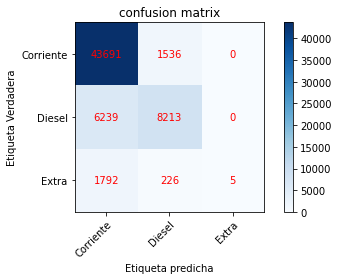

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[43691  1536     0]
 [ 6239  8213     0]
 [ 1792   226     5]]
              precision    recall  f1-score   support

   Corriente       0.84      0.97      0.90     45227
      Diesel       0.82      0.57      0.67     14452
       Extra       1.00      0.00      0.00      2023

    accuracy                           0.84     61702
   macro avg       0.89      0.51      0.53     61702
weighted avg       0.84      0.84      0.82     61702



In [90]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_tests = list(map(str, y_tests))
y_pred = list(map(str, y_pred))

class_names = ['Corriente', 'Diesel','Extra','GNV']
cm = confusion_matrix(y_tests, y_pred)

plot_confusion_matrix(y_tests, y_pred, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_tests, y_pred, digits=2))

In [91]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf = clf.fit(X_trains, y_trains)

In [92]:
#c)aplicar el modelo
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_tree = clf.predict(X_tests)

Se imprime la matriz de Confusión


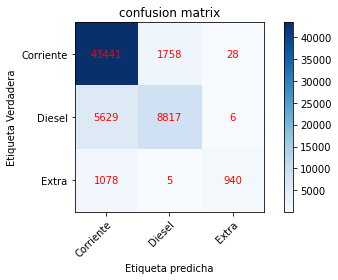

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[43441  1758    28]
 [ 5629  8817     6]
 [ 1078     5   940]]
              precision    recall  f1-score   support

   Corriente       0.87      0.96      0.91     45227
      Diesel       0.83      0.61      0.70     14452
       Extra       0.97      0.46      0.63      2023

    accuracy                           0.86     61702
   macro avg       0.89      0.68      0.75     61702
weighted avg       0.86      0.86      0.85     61702



In [95]:
#d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred_nba, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred_nba)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_tests = list(map(str, y_tests))
y_pred_tree = list(map(str, y_pred_tree))

class_names = ['Corriente', 'Diesel','Extra']
cm = confusion_matrix(y_tests, y_pred_tree)

plot_confusion_matrix(y_tests, y_pred_tree, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_tests, y_pred_tree, digits=2))

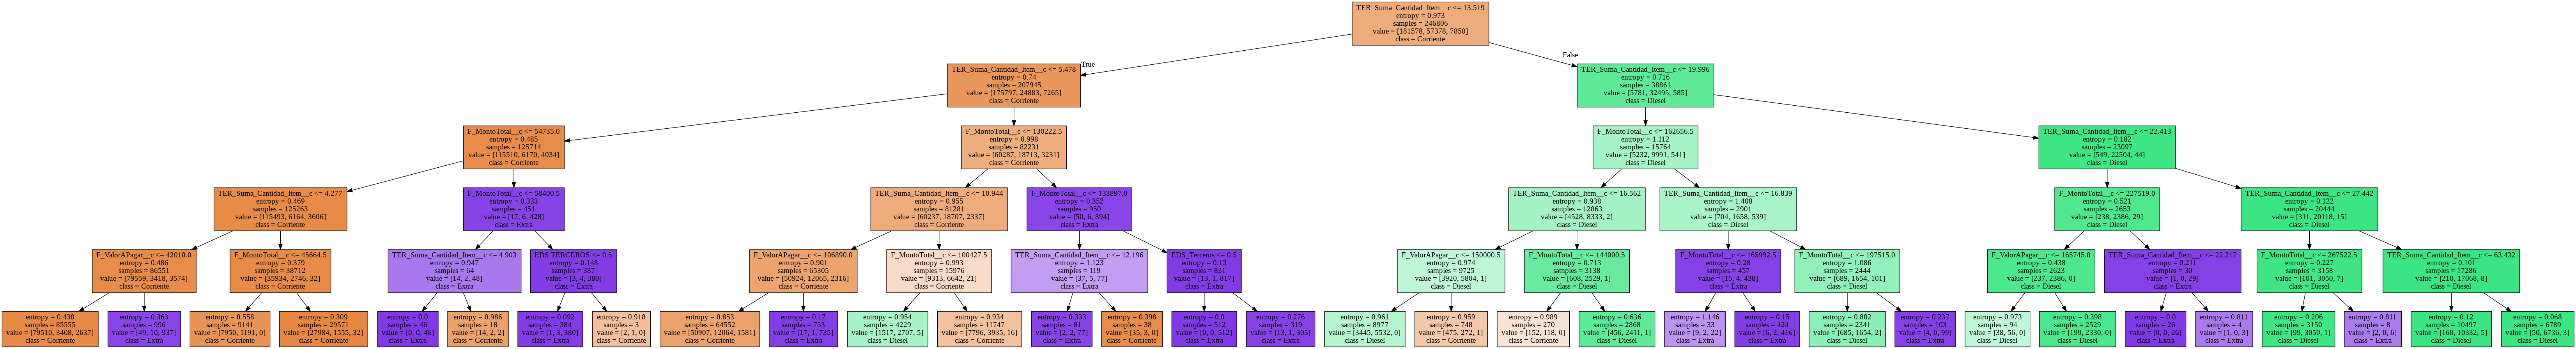

In [96]:
import pydotplus 
from IPython.display import Image
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Corriente','Diesel','Extra'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

#Conclusión 

Podemos concluir que la técnica de la apliación del Árbol de Decisión, supera en gran medida al aplicado de Naive Bayes. Teniendo en cuenta los reporte de clasificación obtenidos para cada uno de los metodos, dado que, el accuracy y el macro avg son mayores

#Hiperparametro

**Con dos ramificaciones de profundidad**

In [102]:
from sklearn import tree

clf2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf2 = clf2.fit(X_trains, y_trains)

In [103]:
#c)aplicar el modelo
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_tree = clf2.predict(X_tests)

Se imprime la matriz de Confusión: 2 Ramificaciones


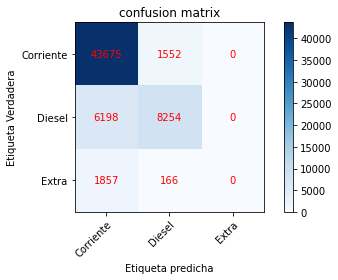

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[43675  1552     0]
 [ 6198  8254     0]
 [ 1857   166     0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   Corriente       0.84      0.97      0.90     45227
      Diesel       0.83      0.57      0.68     14452
       Extra       0.00      0.00      0.00      2023

    accuracy                           0.84     61702
   macro avg       0.56      0.51      0.53     61702
weighted avg       0.81      0.84      0.82     61702



In [104]:
#d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred_nba, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred_nba)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión: 2 Ramificaciones")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_tests = list(map(str, y_tests))
y_pred_tree = list(map(str, y_pred_tree))

class_names = ['Corriente', 'Diesel','Extra']
cm = confusion_matrix(y_tests, y_pred_tree)

plot_confusion_matrix(y_tests, y_pred_tree, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_tests, y_pred_tree, digits=2))

**Con tres ramificaciones de profundidad**

In [106]:
from sklearn import tree

clf3 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf3 = clf3.fit(X_trains, y_trains)

In [107]:
#c)aplicar el modelo
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_tree = clf3.predict(X_tests)

Se imprime la matriz de Confusión: 3 Ramificaciones


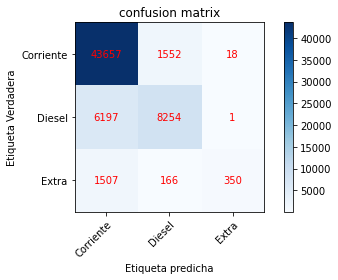

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[43657  1552    18]
 [ 6197  8254     1]
 [ 1507   166   350]]
              precision    recall  f1-score   support

   Corriente       0.85      0.97      0.90     45227
      Diesel       0.83      0.57      0.68     14452
       Extra       0.95      0.17      0.29      2023

    accuracy                           0.85     61702
   macro avg       0.88      0.57      0.62     61702
weighted avg       0.85      0.85      0.83     61702



In [108]:
#d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred_nba, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred_nba)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión: 3 Ramificaciones")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_tests = list(map(str, y_tests))
y_pred_tree = list(map(str, y_pred_tree))

class_names = ['Corriente', 'Diesel','Extra']
cm = confusion_matrix(y_tests, y_pred_tree)

plot_confusion_matrix(y_tests, y_pred_tree, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_tests, y_pred_tree, digits=2))

**Con diez ramificaciones de profundidad**

In [109]:
from sklearn import tree

clf10 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
clf10 = clf10.fit(X_trains, y_trains)

In [110]:
#c)aplicar el modelo
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_tree = clf10.predict(X_tests)

Se imprime la matriz de Confusión: 10 Ramificaciones


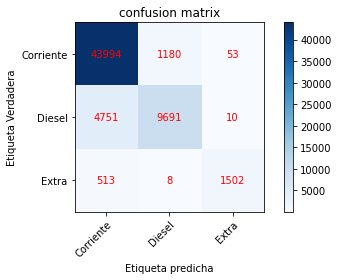

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[43994  1180    53]
 [ 4751  9691    10]
 [  513     8  1502]]
              precision    recall  f1-score   support

   Corriente       0.89      0.97      0.93     45227
      Diesel       0.89      0.67      0.77     14452
       Extra       0.96      0.74      0.84      2023

    accuracy                           0.89     61702
   macro avg       0.91      0.80      0.84     61702
weighted avg       0.89      0.89      0.89     61702



In [111]:
#d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred_nba, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred_nba)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión: 10 Ramificaciones")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_tests = list(map(str, y_tests))
y_pred_tree = list(map(str, y_pred_tree))

class_names = ['Corriente', 'Diesel','Extra']
cm = confusion_matrix(y_tests, y_pred_tree)

plot_confusion_matrix(y_tests, y_pred_tree, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_tests, y_pred_tree, digits=2))

**Con doce ramificaciones de profundidad**

In [124]:
from sklearn import tree

clf12 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=12)
clf12 = clf12.fit(X_trains, y_trains)

In [125]:
#c)aplicar el modelo
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_tree = clf12.predict(X_tests)

Se imprime la matriz de Confusión: 12 Ramificaciones


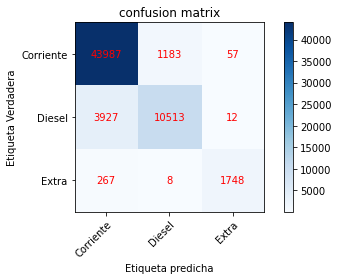

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[43987  1183    57]
 [ 3927 10513    12]
 [  267     8  1748]]
              precision    recall  f1-score   support

   Corriente       0.91      0.97      0.94     45227
      Diesel       0.90      0.73      0.80     14452
       Extra       0.96      0.86      0.91      2023

    accuracy                           0.91     61702
   macro avg       0.92      0.85      0.89     61702
weighted avg       0.91      0.91      0.91     61702



In [126]:
#d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred_nba, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred_nba)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión: 12 Ramificaciones")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_tests = list(map(str, y_tests))
y_pred_tree = list(map(str, y_pred_tree))

class_names = ['Corriente', 'Diesel','Extra']
cm = confusion_matrix(y_tests, y_pred_tree)

plot_confusion_matrix(y_tests, y_pred_tree, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_tests, y_pred_tree, digits=2))

#Conclusión 

Después de haber aplicado diferentes tipos de hiperparametros en profundidad del árbol de decisión, se puede observar que es mejor aplicarlo con 12 ramificaciones, ya que, permitirá tener un mejor accuracy y macro avg